In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport

import os

#!git clone https://github.com/ADPclass/ADP_book_ver01.git
#for dirname, _, filenames in os.walk('ADP_book_ver01/data'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family : NanumGothicCoding')


In [4]:
car = pd.read_csv('datafiles/Carseats.csv').iloc[:,1:]  # index 제거

In [5]:
car.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [7]:
#car.isnull().sum() #결측없음

In [8]:
car['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [10]:
# 정규성 만족한다는 가정하에 평균차이 검정 
import scipy.stats as stats

urban_yes = car.query(" Urban == 'Yes' ")['Sales']
urban_no = car.query(" Urban == 'No' ")['Sales']

# 등분산 검정
stats.levene(urban_yes, urban_no)  # H0 채택 : 등분산 

LeveneResult(statistic=2.9559854965252977e-06, pvalue=0.9986290607894824)

In [11]:
# 독립표본 t-test
stats.ttest_ind(urban_yes, urban_no, equal_var=True)  # H0 채택 : 평균차이 없음

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)

In [13]:
car.groupby(['Urban'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Urban,,,,,,,,
No,118.0,7.563559,2.805846,0.00,5.440,7.67,9.3350,14.90
Yes,282.0,7.468191,2.836219,0.37,5.375,7.42,9.2925,16.27


In [17]:
# 상관분석 
cols = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
car[cols].corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

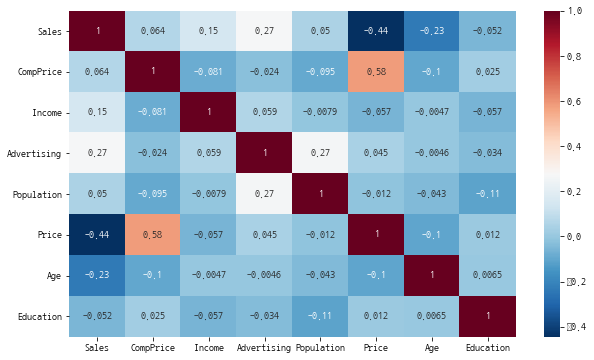

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(car[cols].corr(), cmap='RdBu_r', annot=True)

In [26]:
import scipy.stats as stats
stats.pearsonr(car['Sales'], car['Price'])

(-0.4449507278465726, 7.61818701191294e-21)

In [28]:
for c in cols[1:]:
    print(c)
    print(stats.pearsonr(car['Sales'], car[c]))

CompPrice
(0.06407872955062152, 0.2009398289418295)
Income
(0.1519509794675442, 0.0023096704539517627)
Advertising
(0.2695067813769019, 4.377677110302732e-08)
Population
(0.05047098447203922, 0.31398160931903)
Price
(-0.4449507278465726, 7.61818701191294e-21)
Age
(-0.2318154396045765, 2.7889498393711916e-06)
Education
(-0.05195524196813419, 0.2999441527131608)


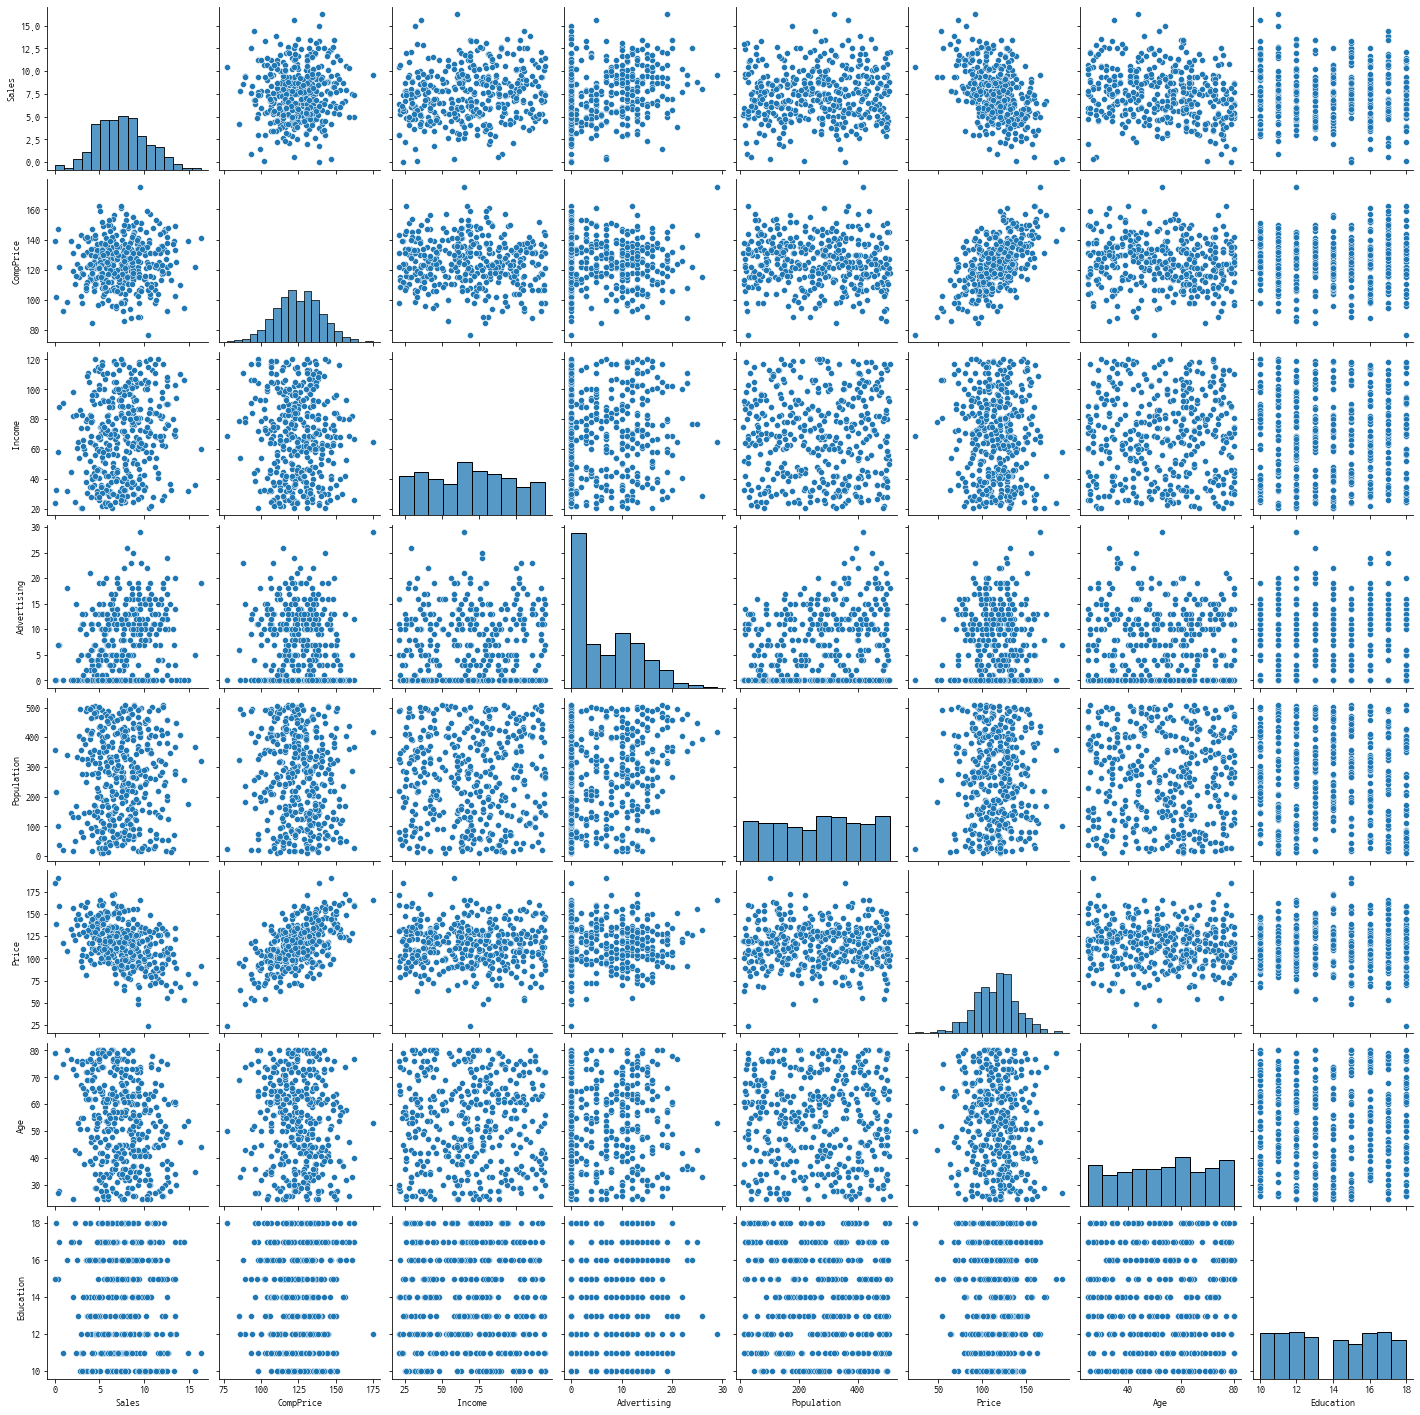

In [29]:
sns.pairplot(car[cols])

In [32]:
# 후진소거법 : R로 해보자
data = car[cols]
data.to_csv('car_for_r.csv', index=False)

In [ ]:
'''
R코드 
data <- read.csv("C:\\users\\car_for_r.csv")
step(lm(Sales ~ ., data=data), direction = 'backward')
data.lm <- lm(Sales ~ CompPrice + Income + Advertising + Price + Age, data=data)
summary(data.lm)
'''

### Black Friday

In [39]:
bf = pd.read_csv('datafiles/BlackFriday.csv')
bf.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [45]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Product_all                 537577 non-null  float64
dtypes: float64(3),

In [40]:
# 결측값 처리하여, Product_all 함수 생성
bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [41]:
bf['Product_Category_2'].fillna(0, inplace=True)
bf['Product_Category_3'].fillna(0, inplace=True)

In [43]:
# bf.isnull().sum() --> OK

In [44]:
bf['Product_all'] = bf['Product_Category_1'] + bf['Product_Category_2'] + bf['Product_Category_3']

In [47]:
# User_ID 문자형 변환
bf['User_ID'] = bf['User_ID'].astype(str)

In [49]:
cols = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for col in cols:
    bf[col] = bf[col].astype(str)

In [50]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  object 
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  object 
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  object 
 8   Product_Category_1          537577 non-null  object 
 9   Product_Category_2          537577 non-null  object 
 10  Product_Category_3          537577 non-null  object 
 11  Purchase                    537577 non-null  int64  
 12  Product_all                 537577 non-null  float64
dtypes: float64(1),

In [54]:
cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'] 

for col in cols:
    print(bf[col].value_counts())

M    405380
F    132197
Name: Gender, dtype: int64
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64
B    226493
C    166446
A    144638
Name: City_Category, dtype: int64
1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64


In [64]:
bf2.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_all',
       'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [62]:
# 해당 변수만 dummy처리 후, concat 
bf2 = bf.copy()

for col in cols:
    bf2 = pd.concat([bf2, pd.get_dummies(bf[col], prefix=col)], axis=1) #회귀분석시 drop=First (다중공선성 방지)

In [65]:
bf2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,...,0,1,0,0,1,0,0,0,0,1


In [66]:
# 군집분석
cols_exclude = ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_all'] 
bf2 = bf2.drop(cols_exclude, axis=1)
bf2.tail()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
537572,16,0,1,2.0,0.0,11664,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537573,16,0,1,15.0,16.0,19196,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537574,16,0,8,15.0,0.0,8043,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537575,16,0,5,0.0,0.0,7172,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537576,16,0,5,8.0,0.0,6875,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [100]:
#bf2['Occupation'].unique()
#bf2['Marital_Status'].unique()
#bf2['Product_Category_2'].unique()

In [98]:
# 텍스트 > 수치형 
for col in bf2.select_dtypes(include='object').columns:
    bf2[col] = bf2[col].astype(float)

In [99]:
bf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     537577 non-null  float64
 1   Marital_Status                 537577 non-null  float64
 2   Product_Category_1             537577 non-null  float64
 3   Product_Category_2             537577 non-null  float64
 4   Product_Category_3             537577 non-null  float64
 5   Purchase                       537577 non-null  int64  
 6   Gender_F                       537577 non-null  uint8  
 7   Gender_M                       537577 non-null  uint8  
 8   Age_0-17                       537577 non-null  uint8  
 9   Age_18-25                      537577 non-null  uint8  
 10  Age_26-35                      537577 non-null  uint8  
 11  Age_36-45                      537577 non-null  uint8  
 12  Age_46-50                     

In [102]:
from sklearn.preprocessing import MinMaxScaler 

mms = MinMaxScaler()

X = pd.DataFrame(mms.fit_transform(bf2), columns=bf2.columns)

In [103]:
X.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,...,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,0.404136,0.408797,0.252679,0.376939,0.215098,0.384794,0.245913,0.754087,0.027358,0.181619,...,0.069977,0.038884,0.269055,0.421322,0.309623,0.135283,0.351935,0.185013,0.173579,0.154190
std,0.326206,0.491612,0.220629,0.345090,0.348109,0.209498,0.430627,0.430627,0.163124,0.385530,...,0.255108,0.193318,0.443469,0.493771,0.462338,0.342026,0.477574,0.388309,0.378747,0.361131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,0.000000,0.000000,0.000000,0.238938,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.350000,0.000000,0.235294,0.277778,0.000000,0.331300,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.700000,1.000000,0.411765,0.777778,0.444444,0.500000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score 

for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    labels =km.labels_
    print(k, calinski_harabasz_score(X, labels))

2 70313.20832874526
3 69331.02366170488
4 66374.06580754323
5 57601.74308643256
6 50847.89460410154
7 47431.18963990954
8 43874.03375722276
9 41461.27442446725


/opt/conda/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


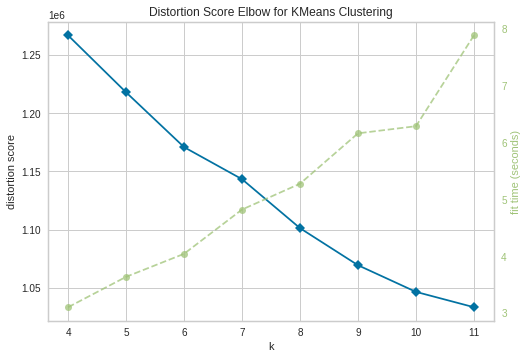

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from yellowbrick.cluster import KElbowVisualizer 

model = KMeans()

vis = KElbowVisualizer(model, k=(4,12), metrics='calinski_harabasz', timing=False)
vis.fit(X)
vis.show()

/opt/conda/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


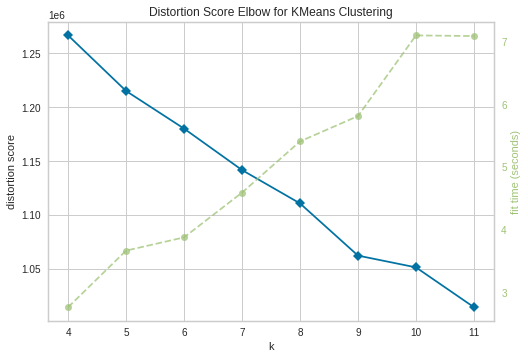

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
model = KMeans()

vis = KElbowVisualizer(model, k=(4,12), timing=False)
vis.fit(X)
vis.show()

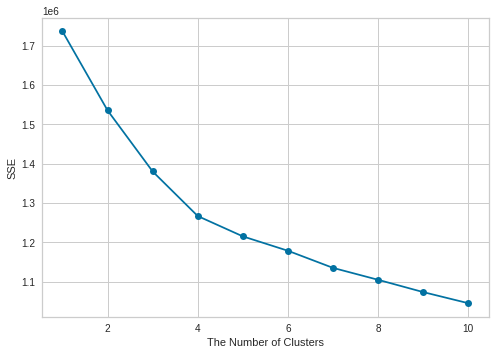

[1735974.7330842847, 1535178.021800201, 1380013.5098635647, 1266756.1135910884, 1215152.2929894314, 1178577.0775157232, 1135072.4749729657, 1104794.959820284, 1073564.1841027252, 1045320.9796430436]


In [107]:
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')    
plt.xlabel('The Number of Clusters')
plt.ylabel('SSE')
plt.show()
print(sse)

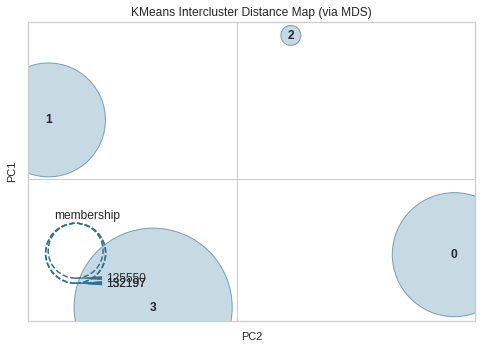

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [113]:
# https://www.scikit-yb.org/en/latest/api/cluster/icdm.html
from yellowbrick.cluster import InterclusterDistance

km = KMeans(n_clusters=4, random_state=42)
viz = InterclusterDistance(km)
viz.fit(X)
viz.show()

In [ ]:
# 군집결과 해석

In [115]:
pd.concat([pd.Series(km.labels_).value_counts(),
           pd.Series(km.labels_).value_counts(normalize=True)*100], 
          axis=1, keys=['count', 'pct']).sort_index()

,count,pct
0,132197,24.591268
1,125550,23.354794
2,109831,20.430748
3,169999,31.623191


In [118]:
bf['cluster'] = km.labels_

In [119]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all,cluster
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0,1


In [135]:
pd.crosstab??

In [139]:
pd.concat([pd.crosstab(bf['cluster'], bf['Gender'], margins=True),
           pd.crosstab(bf['cluster'], bf['Gender'], margins=True, normalize='index')], axis=1)

Gender,F,M,All,F,M
cluster,,,,,
0,132197,0,132197,1.000000,0.000000
1,0,125550,125550,0.000000,1.000000
2,0,109831,109831,0.000000,1.000000
3,0,169999,169999,0.000000,1.000000
All,132197,405380,537577,0.245913,0.754087


<AxesSubplot:xlabel='Gender', ylabel='cluster'>

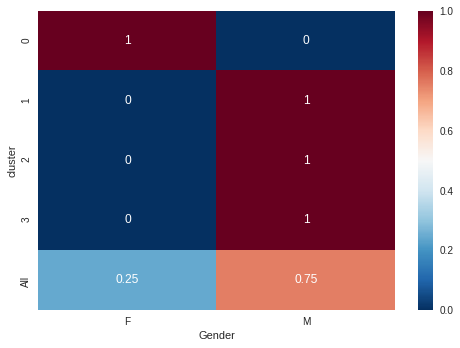

In [143]:
# 비중 시각화
sns.heatmap(pd.crosstab(bf['cluster'], bf['Gender'], margins=True, normalize='index'), 
            cmap='RdBu_r', annot=True)

In [140]:
pd.concat([pd.crosstab(bf['cluster'], bf['Age'], margins=True),
           pd.crosstab(bf['cluster'], bf['Age'], margins=True, normalize='index')], axis=1)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All,0-17,18-25,26-35,36-45,46-50,51-55,55+
cluster,,,,,,,,,,,,,,,
0,4953,24057,49348,26420,12856,9634,4929,132197,0.037467,0.181978,0.373291,0.199853,0.097249,0.072876,0.037285
1,4933,21668,41424,26105,11792,10506,9122,125550,0.039291,0.172585,0.329940,0.207925,0.093923,0.083680,0.072656
2,1069,20911,55051,19185,6251,4225,3139,109831,0.009733,0.190393,0.501234,0.174677,0.056915,0.038468,0.028580
3,3752,30998,68867,35789,13627,13253,3713,169999,0.022071,0.182342,0.405102,0.210525,0.080159,0.077959,0.021841
All,14707,97634,214690,107499,44526,37618,20903,537577,0.027358,0.181619,0.399366,0.199969,0.082827,0.069977,0.038884


<AxesSubplot:xlabel='Age', ylabel='cluster'>

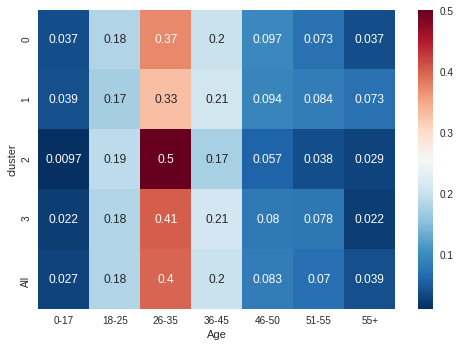

In [142]:
# 비중 시각화
sns.heatmap(pd.crosstab(bf['cluster'], bf['Age'], margins=True, normalize='index'), 
            cmap='RdBu_r', annot=True)

<AxesSubplot:xlabel='Marital_Status', ylabel='cluster'>

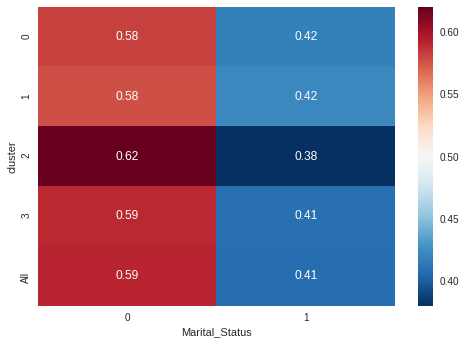

In [144]:
sns.heatmap(pd.crosstab(bf['cluster'], bf['Marital_Status'], margins=True, normalize='index'), 
            cmap='RdBu_r', annot=True)

In [145]:
bf.groupby('cluster')['Purchase'].mean()

cluster
0     8809.761349
1    10033.197730
2     9061.717739
3     9400.754481
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='cluster', ylabel='Purchase'>

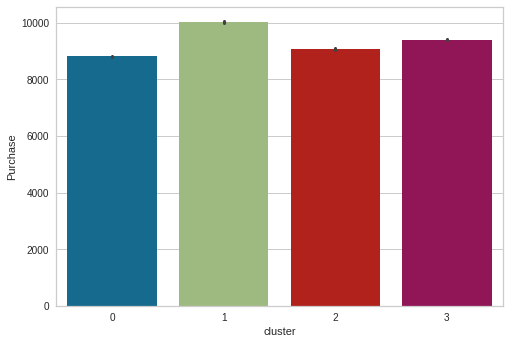

In [147]:
sns.barplot(x='cluster', y='Purchase', data=bf)

<AxesSubplot:xlabel='cluster', ylabel='Purchase'>

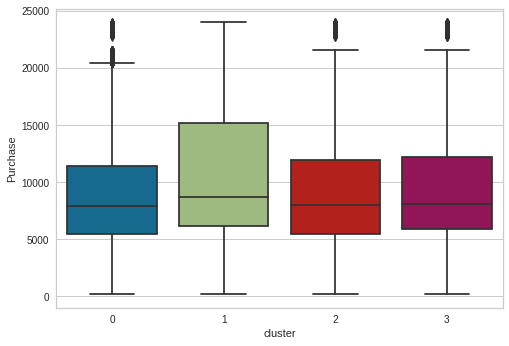

In [148]:
sns.boxplot(x='cluster', y='Purchase', data=bf)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

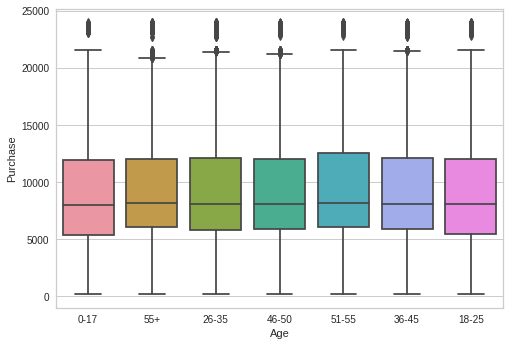

In [150]:
sns.boxplot(x='Age', y='Purchase', data=bf)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

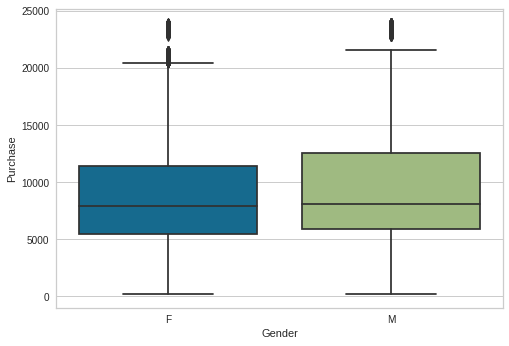

In [151]:
sns.boxplot(x='Gender', y='Purchase', data=bf)

In [120]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  object 
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  object 
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  object 
 8   Product_Category_1          537577 non-null  object 
 9   Product_Category_2          537577 non-null  object 
 10  Product_Category_3          537577 non-null  object 
 11  Purchase                    537577 non-null  int64  
 12  Product_all                 537577 non-null  float64
 13  cluster       